In [1]:
import numpy as np
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests

%matplotlib inline

In [2]:
sns.color_palette("Spectral", as_cmap=True)

In [3]:
#load the csv from url

url="https://raw.githubusercontent.com/georgetown-analytics/nba/master/fixtures/nba_players.csv"
s=requests.get(url).content
nba_players=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
nba_players.head()

,PLAYER,TEAM,POS,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,AGE,HT,WT,SALARY
0,Kevin Durant,OKC,SF,81,38.5,0.635,16.1,10.3,31.2,2.2,18.6,10.8,29.90,903.8,30.1,25,81,240,18995624
1,LeBron James,MIA,SF,77,37.7,0.649,20.6,11.4,29.1,3.6,18.9,11.5,29.40,818.5,27.3,29,80,250,20644400
2,Kevin Love,MIN,PF,77,36.3,0.591,15.2,8.7,27.7,8.5,29.5,18.7,26.97,645.8,21.5,25,82,243,15719063
3,Anthony Davis,NO,PF,67,35.2,0.582,7.4,7.7,23.2,10.0,23.3,16.6,26.54,529.3,17.6,21,82,220,5607240
4,DeMarcus Cousins,SAC,C,71,32.4,0.555,10.8,13.1,30.7,10.6,30.5,20.4,26.18,534.5,17.8,24,83,270,14746000


In [5]:
nba_players.shape

(323, 19)

In [6]:
nba_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  323 non-null    object 
 1   TEAM    323 non-null    object 
 2   POS     323 non-null    object 
 3   GP      323 non-null    int64  
 4   MPG     323 non-null    float64
 5   TS%     323 non-null    float64
 6   AST     323 non-null    float64
 7   TO      323 non-null    float64
 8   USG     323 non-null    float64
 9   ORR     323 non-null    float64
 10  DRR     323 non-null    float64
 11  REBR    323 non-null    float64
 12  PER     323 non-null    float64
 13  VA      323 non-null    float64
 14  EWA     323 non-null    float64
 15  AGE     323 non-null    int64  
 16  HT      323 non-null    int64  
 17  WT      323 non-null    int64  
 18  SALARY  323 non-null    int64  
dtypes: float64(11), int64(5), object(3)
memory usage: 48.1+ KB


In [7]:
nba_players.describe()

,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,AGE,HT,WT,SALARY
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,3.230000e+02
mean,67.160991,24.880495,0.537780,15.951703,11.038700,18.436842,5.398452,15.037771,10.216718,14.647492,117.616718,3.921981,27.167183,79.139319,222.058824,5.323345e+06
std,14.058620,7.538099,0.046048,8.116238,2.782993,4.678354,3.880309,5.982287,4.673903,4.124858,143.553819,4.784627,4.058949,3.557308,26.848313,5.038149e+06
min,17.000000,7.000000,0.390000,3.300000,3.000000,8.600000,0.800000,5.400000,3.800000,5.230000,-89.200000,-3.000000,19.000000,69.000000,161.000000,0.000000e+00
25%,59.500000,18.900000,0.507000,9.700000,9.100000,14.700000,2.150000,10.100000,6.200000,11.990000,22.400000,0.750000,24.000000,76.000000,200.000000,1.522920e+06
50%,72.000000,25.200000,0.537000,14.100000,10.700000,18.000000,4.000000,13.600000,9.200000,14.100000,77.200000,2.600000,27.000000,80.000000,222.000000,3.657500e+06
75%,79.000000,31.550000,0.569500,20.950000,12.600000,21.900000,8.400000,19.300000,14.200000,16.705000,172.550000,5.750000,29.000000,82.000000,240.500000,7.500000e+06
max,83.000000,38.700000,0.695000,47.100000,23.700000,33.500000,17.500000,32.100000,22.300000,29.900000,903.800000,30.100000,39.000000,86.000000,290.000000,2.341099e+07


In [8]:
nba_players.isnull().sum()

PLAYER    0
TEAM      0
POS       0
GP        0
MPG       0
TS%       0
AST       0
TO        0
USG       0
ORR       0
DRR       0
REBR      0
PER       0
VA        0
EWA       0
AGE       0
HT        0
WT        0
SALARY    0
dtype: int64

In [9]:
# GP = games played
# MPG = Minutes played per game
# TS% =  true shooting percentage.
# It is intended to more accurately calculate a player's shooting than field goal percentage, free throw percentage, and three-point field goal percentage taken individually.
# AST = assists
# TO = turnovers
# USG = usage percentage
# ORR = Offensive rebound rate < https://ilevy.wordpress.com/stats-glossary/trrdrrorr/#:~:text=Whats%20is%20it%3F,Tm%20RB%20%2B%20Opp%20RB)).>
# DRR = Defensive rebound rate
# REBR = (Total?) rebound rate
# PER = Player efficiency rating 
# VA = Value Added (?) Value Added - the estimated number of points a player adds to a team's season total above what a 'replacement player'
# (for instance, the 12th man on the roster) would produce. Value Added = ([Minutes * (PER - PRL)] / 67). PRL (Position Replacement Level) = 11.5 for power forwards, 11.0 for point guards, 10.6 for centers, 10.5 for shooting guards and small forwards
# EWA = Estimated Wins Added

# Summary Statistics of the Salary Field

The summary descriptive statistics below indicate that average (mean) salary is 5,323,345 and median (50th percentile) wages are 3,657,500. This means that half the players earn less than 3,657,500 and half earn more. But mean (average) salary is significantly higher than median salary and most people earn less than the average. This is a characteristic of right skewed distributions. 

The standard deviation of the original dataset is ~$5,038,149.32. Variability in salary is high: although median salary is 3,657,500, the central half of the sample earns between 1,522,920 and 7,500,000.

Of note: 24 players are displayed as having a salary value of 0, and 0 is the mode of the original dataset. The reason why is unclear, as the NBA has a minimum salary significantly above 0. Ignoring these 24 values, the average (mean) salary of 5,750,637 and the median value of 4,025,000 both rise. Adjusting for zero-value salaries does not change the underlying skewed distribution. 

The mode of the original dataset is 0, and is 915,243 dollars in the adjusted data set.

In [10]:
above_zero = nba_players[nba_players["SALARY"] > 0]

original_stats = nba_players["SALARY"].describe().apply(lambda x: format(x, 'f'))
altered_stats = above_zero["SALARY"].describe().apply(lambda x: format(x, 'f'))

pd.concat([original_stats, altered_stats], keys=['Original Statistics', 'Zero-Values Removed'], axis=1)

,Original Statistics,Zero-Values Removed
count,323.000000,299.000000
mean,5323345.151703,5750637.070234
std,5038149.316276,4996175.182865
min,0.000000,816482.000000
25%,1522920.000000,2076380.000000
50%,3657500.000000,4025000.000000
75%,7500000.000000,8000000.000000
max,23410988.000000,23410988.000000


In [11]:
#Compute the summary statistics for the SALARY field (e.g. mean, median, mode, maximum, minimum)
#median=50th percentile

nba_players["SALARY"].describe().apply(lambda x: format(x, 'f'))

count         323.000000
mean      5323345.151703
std       5038149.316276
min             0.000000
25%       1522920.000000
50%       3657500.000000
75%       7500000.000000
max      23410988.000000
Name: SALARY, dtype: object

In [12]:
# mode of original dataset
nba_players["SALARY"].mode()

0    0
dtype: int64

In [13]:
# number of players who have a recorded salary of 0
nba_players[nba_players["SALARY"] == 0]["PLAYER"].count()

24

In [14]:
above_zero["SALARY"].describe().apply(lambda x: format(x, 'f'))

count         299.000000
mean      5750637.070234
std       4996175.182865
min        816482.000000
25%       2076380.000000
50%       4025000.000000
75%       8000000.000000
max      23410988.000000
Name: SALARY, dtype: object

In [15]:
# mode of dataset removing 0 values
above_zero["SALARY"].mode()

0    915243
dtype: int64

# Relationship of Player Efficiency (PER) to Salary

Comparisons indicate a positive correlation between player efficiency. This correlation is very slightly higher when questionable zero-values are removed. 

In [16]:
nba_players["SALARY"].corr(nba_players["PER"])

0.5909741860869964

In [17]:
covariance = np.cov(nba_players.SALARY,nba_players.PER)
covariance

array([[2.53829485e+13, 1.22814179e+07],
       [1.22814179e+07, 1.70144505e+01]])

In [18]:
above_zero["SALARY"].corr(above_zero["PER"])

0.6045082652371866

In [19]:
covariance = np.cov(above_zero.SALARY,above_zero.PER)
covariance

array([[2.49617665e+13, 1.26447130e+07],
       [1.26447130e+07, 1.75282336e+01]])

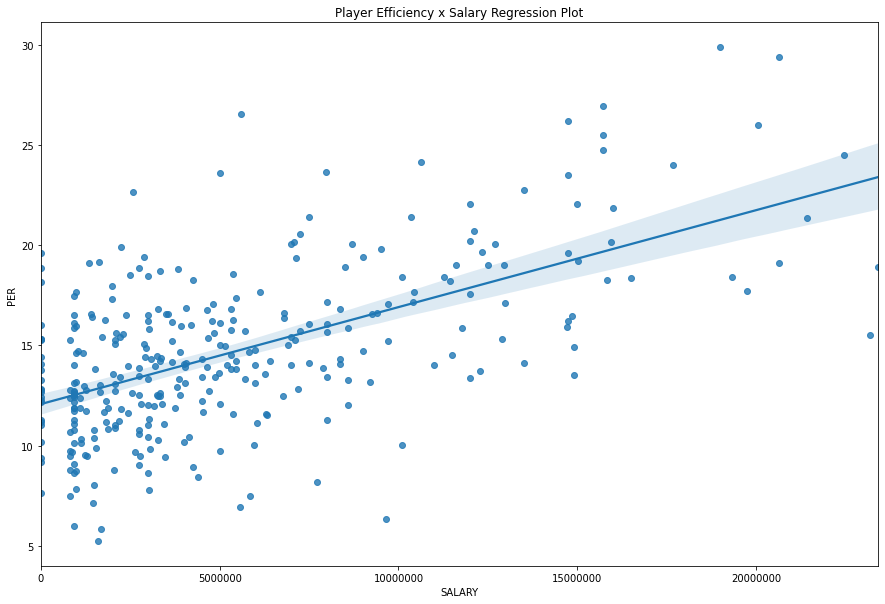

In [20]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x="SALARY", y="PER", data=nba_players)
ax.set_title("Player Efficiency x Salary Regression Plot")
plt.ticklabel_format(style='plain', axis='x')

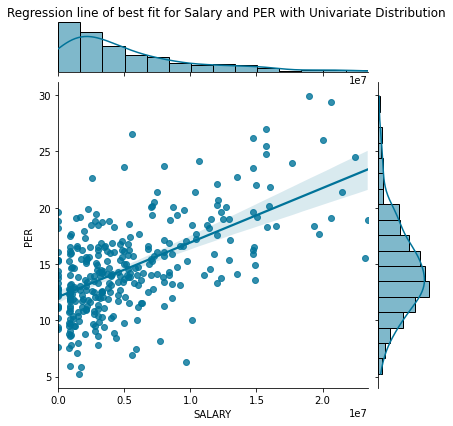

In [21]:
p = sns.jointplot(x ="SALARY", y ="PER", data=nba_players, kind="reg", color="#007399")
p.fig.suptitle("Regression line of best fit for Salary and PER with Univariate Distribution")
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room for title

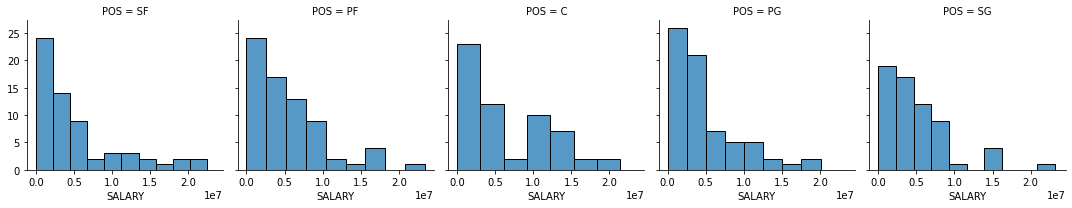

In [22]:
g = sns.FacetGrid(nba_players, col="POS")
g.map(sns.histplot, "SALARY")

<Figure size 1080x1080 with 0 Axes>

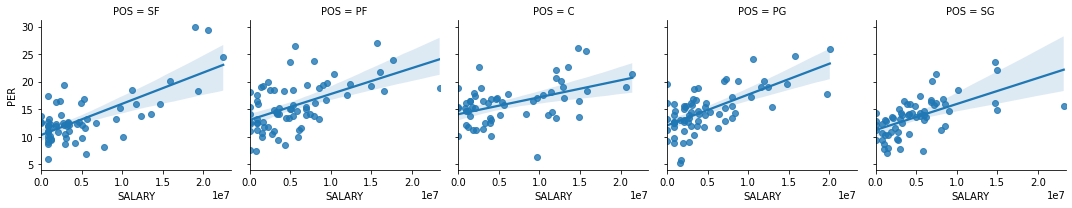

In [23]:
plt.figure(figsize=(15,15))
g = sns.FacetGrid(nba_players, col="POS")
g.map(sns.regplot,"SALARY", "PER")

Text(0.5, 1.0, 'Salary Distribution by Position')

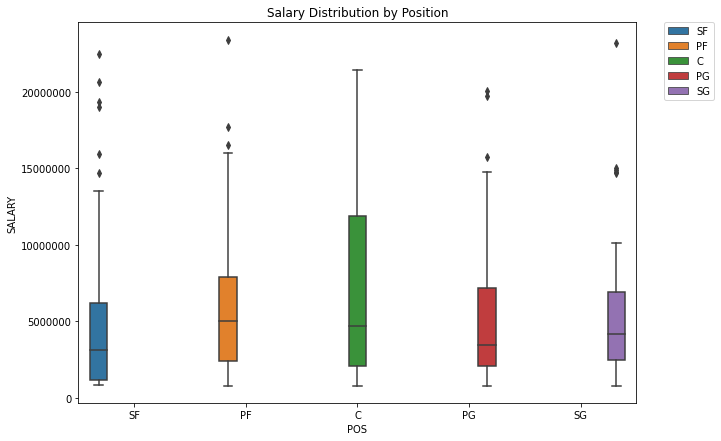

In [24]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="POS", y="SALARY", data=above_zero,
                 hue="POS")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ticklabel_format(style='plain', axis='y')
ax.set_title("Salary Distribution by Position")

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1080x1080 with 0 Axes>

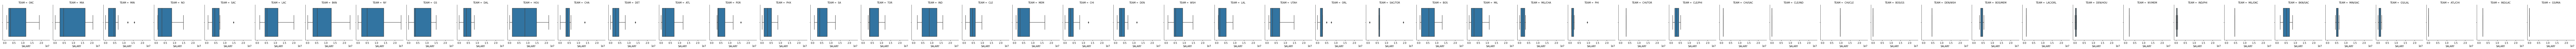

In [25]:
plt.figure(figsize=(15,15))
g = sns.FacetGrid(nba_players, col="TEAM")
g.map(sns.boxplot,"SALARY")

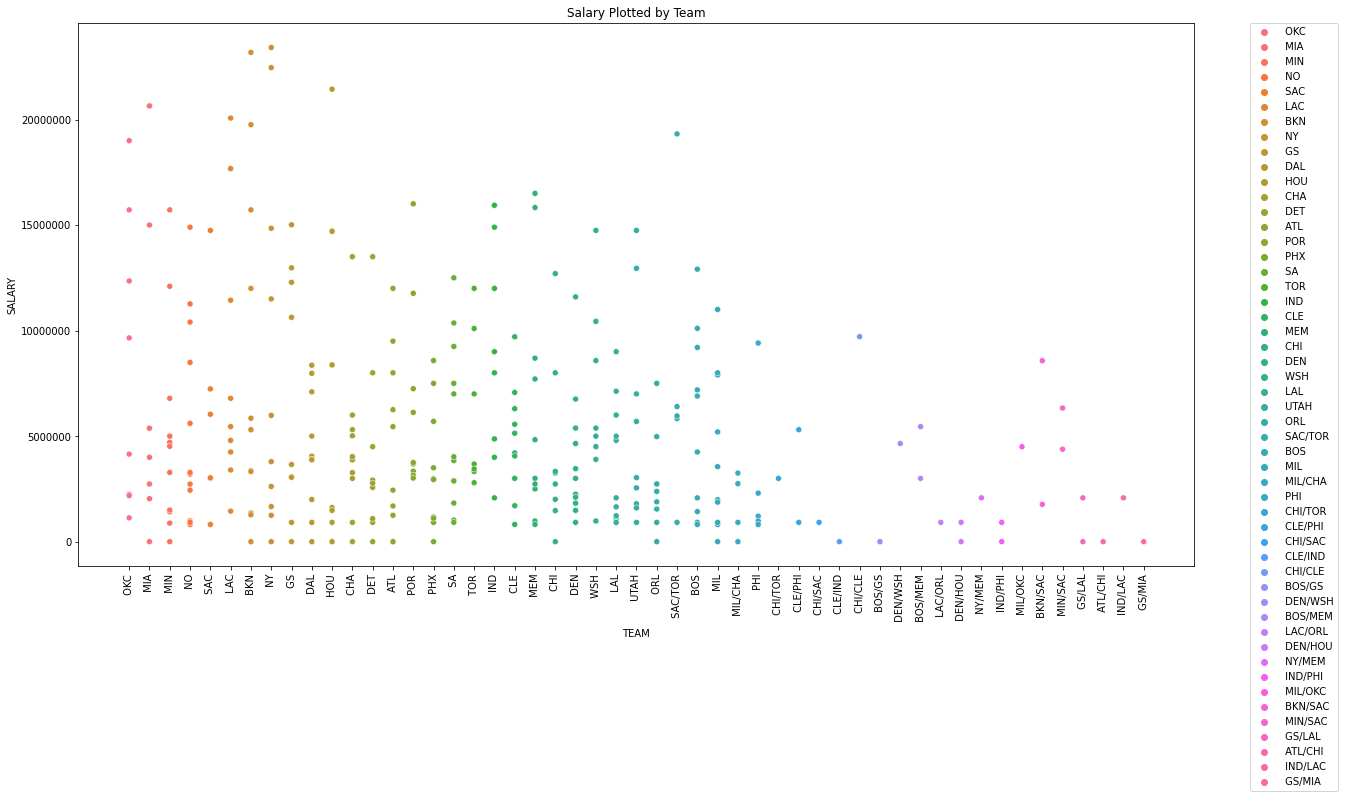

In [26]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="TEAM",y="SALARY",data=nba_players,hue="TEAM")
ax.set_title("Salary Plotted by Team")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Budget Recommendations

In [27]:
nba_players.columns

Index(['PLAYER', 'TEAM', 'POS', 'GP', 'MPG', 'TS%', 'AST', 'TO', 'USG', 'ORR',
       'DRR', 'REBR', 'PER', 'VA', 'EWA', 'AGE', 'HT', 'WT', 'SALARY'],
      dtype='object')

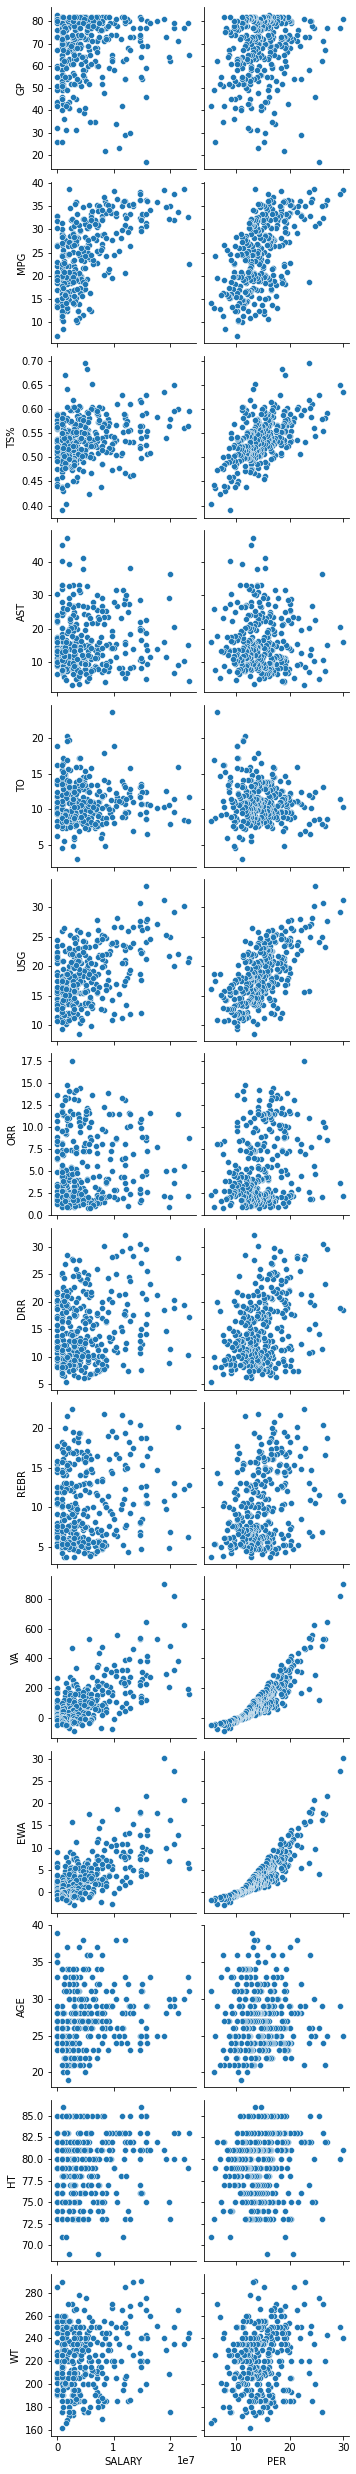

In [28]:
ax = sns.pairplot(
    nba_players,
    x_vars=["SALARY","PER"],
    y_vars=["GP","MPG","TS%","AST","TO","USG","ORR","DRR","REBR","VA","EWA","AGE","HT","WT"],
)
ax

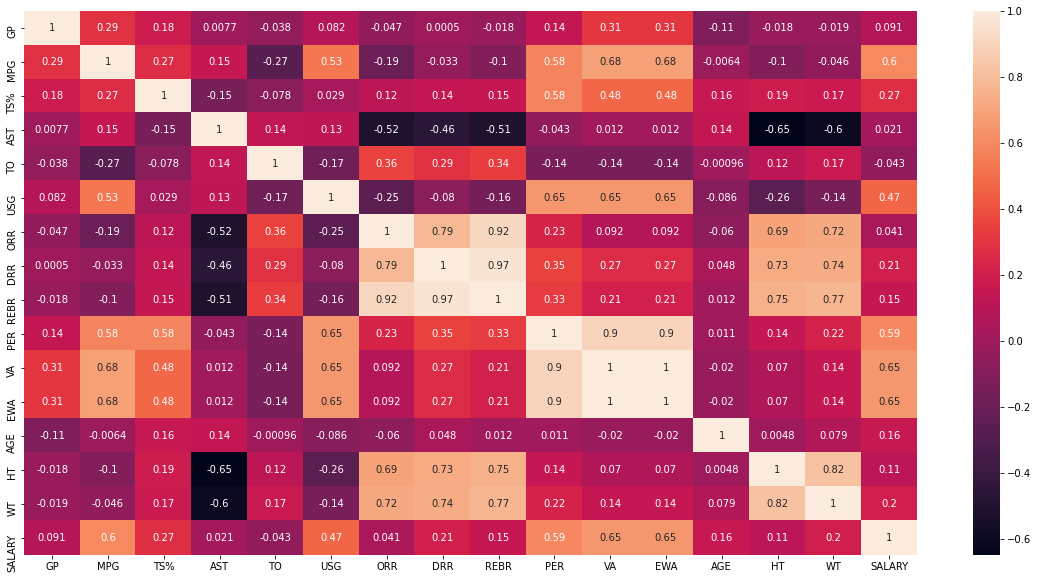

In [29]:
# correlation matrix

plt.figure(figsize=(20,10))
correlation_mat = nba_players.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

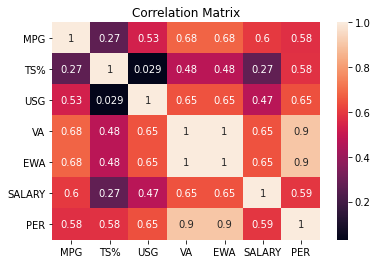

In [30]:

correlation_subset = nba_players[["MPG","TS%","USG","VA","EWA","SALARY","PER"]].corr()
sns.heatmap(correlation_subset, annot = True)
plt.title("Correlation Matrix")
plt.show()

A look at the correlation matrix shows that there is a correlation coefficient of interest between PER the following columns

positive correlation of interest with PER: MPG (0.58), TS% (0.58), USG (0.65), VA (0.9), EWA (0.9), SALARY (0.59)   
negative correlation with PER: none  

positive correlation of interest with SALARY: MPG (0.6), PER (0.59), VA (0.65), EWA (0.65)

Text(0.5, 1.0, 'Salary x Value Added (VA)')

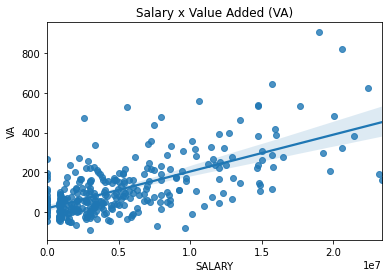

In [31]:
salary_value = sns.regplot(x='SALARY', y='VA', data=nba_players)
salary_value.set_title("Salary x Value Added (VA)")

In [32]:
VA_subset = nba_players[(nba_players["VA"] > 200) & (nba_players["SALARY"] < 10000000)]
VA_subset[["VA","PER","SALARY","MPG","EWA","TS%","USG"]].describe()

,VA,PER,SALARY,MPG,EWA,TS%,USG
count,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000
mean,284.155172,18.904138,5.486525e+06,32.106897,9.472414,0.561931,22.065517
std,91.549583,2.473760,2.727132e+06,3.492434,3.039960,0.030761,3.700606
min,200.300000,15.700000,0.000000e+00,22.800000,6.700000,0.499000,13.000000
25%,218.400000,16.830000,2.989239e+06,30.300000,7.300000,0.536000,19.700000
50%,245.800000,18.690000,6.124729e+06,32.900000,8.200000,0.568000,23.200000
75%,331.000000,20.060000,7.500000e+06,35.000000,11.000000,0.588000,24.900000
max,529.300000,26.540000,9.500000e+06,36.900000,17.600000,0.605000,27.800000


Text(0.5, 1.0, 'Salary x Value Added (VA) (subset)')

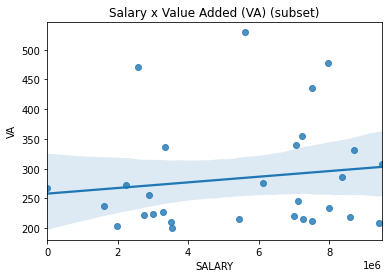

In [33]:
salary_va_subset = sns.regplot(x='SALARY', y='VA', data=VA_subset)
salary_va_subset.set_title("Salary x Value Added (VA) (subset)")

Text(0.5, 1.0, 'Value Added compared to Salary')

<Figure size 1080x1080 with 0 Axes>

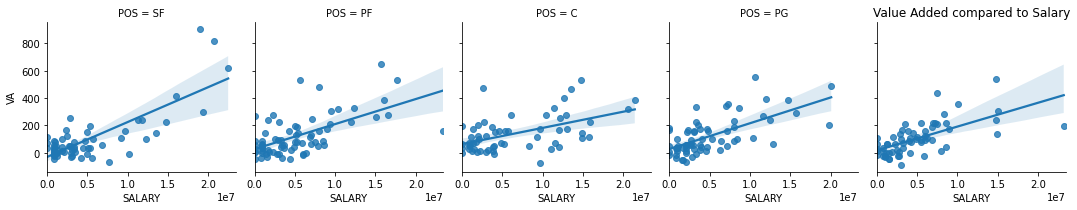

In [34]:
plt.figure(figsize=(15,15))
g = sns.FacetGrid(nba_players, col="POS")
g.map(sns.regplot,"SALARY", "VA")
plt.title("Value Added compared to Salary")

In [35]:
positions = nba_players.groupby(by="POS").describe()

In [36]:
positions["PER"]

,count,mean,std,min,25%,50%,75%,max
POS,,,,,,,,
C,58.0,16.118448,3.721966,6.32,13.885,16.22,17.8975,26.18
PF,71.0,15.566056,4.255477,7.49,12.610,14.96,18.5300,26.97
PG,69.0,14.751304,3.949859,5.23,12.640,14.44,16.5900,25.98
SF,62.0,13.219355,4.482728,5.97,10.515,12.30,14.0650,29.90
SG,63.0,13.549841,3.469242,7.13,11.045,13.64,15.6700,23.51


In [37]:
positions["SALARY"]

,count,mean,std,min,25%,50%,75%,max
POS,,,,,,,,
C,58.0,6.549379e+06,5.692688e+06,0.0,1868392.5,4041043.5,11485030.75,21436271.0
PF,71.0,5.330547e+06,4.869983e+06,0.0,1582260.0,4382576.0,7314000.00,23410988.0
PG,69.0,4.825030e+06,4.614522e+06,0.0,1690680.0,3272091.0,7097191.00,20068563.0
SF,62.0,5.130897e+06,5.570296e+06,0.0,1084000.0,3024960.0,5665980.00,22458401.0
SG,63.0,4.921667e+06,4.414921e+06,0.0,1678560.0,4025000.0,6792500.00,23180790.0


In [38]:
positions["MPG"]

,count,mean,std,min,25%,50%,75%,max
POS,,,,,,,,
C,58.0,23.582759,7.392199,7.0,17.600,23.4,30.20,35.3
PF,71.0,23.316901,7.466075,11.3,17.100,22.2,29.60,36.3
PG,69.0,26.097101,7.446969,10.5,19.700,27.3,32.20,36.5
SF,62.0,25.120968,7.744975,10.0,18.475,25.6,31.00,38.7
SG,63.0,26.268254,7.352656,8.5,20.250,25.9,32.65,38.7


In [39]:
positions["VA"]

,count,mean,std,min,25%,50%,75%,max
POS,,,,,,,,
C,58.0,141.208621,131.364844,-77.1,46.00,115.35,196.80,534.5
PF,71.0,124.564789,146.646353,-46.5,22.05,81.60,192.55,645.8
PG,69.0,118.773913,131.842143,-66.0,35.00,64.60,177.70,557.6
SF,62.0,100.658065,182.016143,-67.4,0.90,42.95,116.35,903.8
SG,63.0,103.488889,118.971123,-89.2,9.95,90.50,162.75,539.2


In [40]:
positions["EWA"]

,count,mean,std,min,25%,50%,75%,max
POS,,,,,,,,
C,58.0,4.710345,4.369860,-2.6,1.525,3.85,6.525,17.8
PF,71.0,4.152113,4.886976,-1.6,0.750,2.70,6.450,21.5
PG,69.0,3.960870,4.397600,-2.2,1.200,2.20,5.900,18.6
SF,62.0,3.356452,6.065966,-2.2,0.025,1.40,3.850,30.1
SG,63.0,3.450794,3.971425,-3.0,0.350,3.00,5.400,18.0
